# 담양, 신안, 함평 데이터셋 나누기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [2]:
df = pd.read_csv('고령인구1km.csv', encoding='cp949')
df.head(10)

,Longitude,Latitude,layer_2,val,fid
0,125.127100,34.052418,신안250,73.0,79101
1,125.194140,34.684377,신안250,77.0,85360
2,125.378067,34.678356,신안250,36.0,48546
3,125.410382,34.645062,신안250,56.0,97526
4,125.444421,34.736890,신안250,79.0,46890
5,125.463781,34.730600,신안250,101.0,76538
6,125.468706,34.651700,신안250,14.0,67252
7,125.469064,34.207227,신안250,32.0,48515
8,125.853521,34.617985,신안250,34.0,88977
9,125.932763,34.721212,신안250,164.0,18304


In [3]:
df_dam = df[df['layer_2'] == '담양250']
df_sin = df[df['layer_2'] == '신안250']
df_ham = df[df['layer_2'] == '함평250']

In [4]:
df.dropna(axis=0,how='any',subset=['Latitude','Longitude'],inplace=True)

# 담양 클러스터링

In [5]:
# Variable with the Longitude and Latitude
X_dam=df_dam.loc[:,['fid','Latitude','Longitude']]

C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

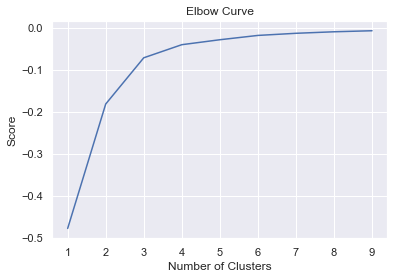

In [6]:
# Elbow Method
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_dam[['Latitude']]
X_axis = df_dam[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [7]:
# K-Means Clustering
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X_dam[X_dam.columns[1:3]]) # Compute k-means clustering.
X_dam['cluster_label'] = kmeans.fit_predict(X_dam[X_dam.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X_dam[X_dam.columns[1:3]]) # Labels of each point
X_dam.head(10)

C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,fid,Latitude,Longitude,cluster_label
437,65975,35.287425,126.881223,0
438,32576,35.247285,126.883040,0
439,56952,35.260133,126.884317,0
440,49764,35.276294,126.887137,0
441,45895,35.276694,126.887941,0
442,703593,35.274936,126.887950,0
443,72036,35.274801,126.887971,0
444,68340,35.262895,126.888401,0
445,67650,35.287822,126.894958,0
446,142209,35.286186,126.902177,0


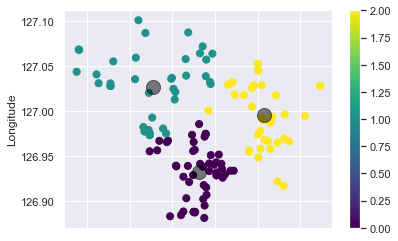

In [8]:
X_dam.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')  
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [9]:
X_dam = X_dam[['fid','cluster_label']]

In [10]:
clustered_data_dam = df_dam.merge(X_dam, left_on='fid', right_on='fid')
clustered_data_dam.head(5)

,Longitude,Latitude,layer_2,val,fid,cluster_label
0,126.881223,35.287425,담양250,167.0,65975,0
1,126.883040,35.247285,담양250,64.0,32576,0
2,126.884317,35.260133,담양250,147.0,56952,0
3,126.887137,35.276294,담양250,506.0,49764,0
4,126.887941,35.276694,담양250,513.0,45895,0


# 신안 클러스터링

In [11]:
# Variable with the Longitude and Latitude
X_sin=df_sin.loc[:,['fid','Latitude','Longitude']]

C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

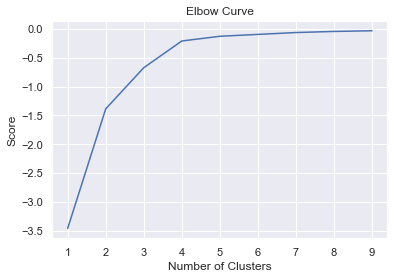

In [12]:
# Elbow Method
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_sin[['Latitude']]
X_axis = df_sin[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:
# K-Means Clustering
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X_sin[X_sin.columns[1:3]]) # Compute k-means clustering.
X_sin['cluster_label'] = kmeans.fit_predict(X_sin[X_sin.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X_sin[X_sin.columns[1:3]]) # Labels of each point
X_sin.head(10)

C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,fid,Latitude,Longitude,cluster_label
0,79101,34.052418,125.127100,1
1,85360,34.684377,125.194140,1
2,48546,34.678356,125.378067,1
3,97526,34.645062,125.410382,1
4,46890,34.736890,125.444421,1
5,76538,34.730600,125.463781,1
6,67252,34.651700,125.468706,1
7,48515,34.207227,125.469064,1
8,88977,34.617985,125.853521,0
9,18304,34.721212,125.932763,0


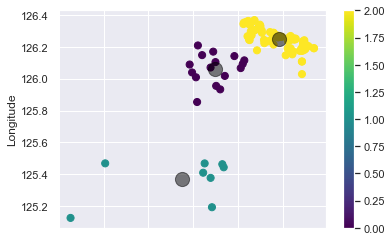

In [14]:
X_sin.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')  
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [15]:
X_sin = X_sin[['fid','cluster_label']]

In [16]:
clustered_data_sin = df_sin.merge(X_sin, left_on='fid', right_on='fid')
clustered_data_sin.head(5)

,Longitude,Latitude,layer_2,val,fid,cluster_label
0,125.127100,34.052418,신안250,73.0,79101,1
1,125.194140,34.684377,신안250,77.0,85360,1
2,125.378067,34.678356,신안250,36.0,48546,1
3,125.410382,34.645062,신안250,56.0,97526,1
4,125.444421,34.736890,신안250,79.0,46890,1


# 함평 클러스터링

In [17]:
# Variable with the Longitude and Latitude
X_ham=df_ham.loc[:,['fid','Latitude','Longitude']]

C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

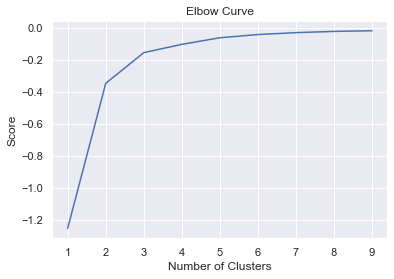

In [18]:
# Elbow Method
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_ham[['Latitude']]
X_axis = df_ham[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [19]:
# K-Means Clustering
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(X_ham[X_ham.columns[1:3]]) # Compute k-means clustering.
X_ham['cluster_label'] = kmeans.fit_predict(X_ham[X_ham.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X_ham[X_ham.columns[1:3]]) # Labels of each point
X_ham.head(10)

C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,fid,Latitude,Longitude,cluster_label
100,55800,35.160881,126.378319,0
101,57876,35.168751,126.381494,0
102,64670,35.152685,126.390696,0
103,74638,35.165128,126.391451,0
104,40464,35.137782,126.392688,0
105,76728,35.154077,126.394666,0
106,67740,35.138141,126.403506,0
107,72605,35.171167,126.403871,0
108,75375,35.154949,126.407865,0
109,99636,35.155227,126.408732,0


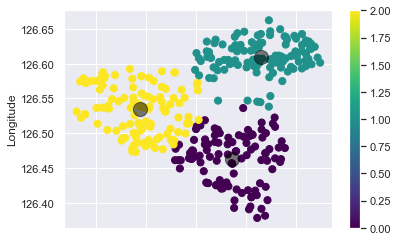

In [20]:
X_ham.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')  
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [21]:
X_ham = X_ham[['fid','cluster_label']]

In [22]:
clustered_data_ham = df_ham.merge(X_ham, left_on='fid', right_on='fid')
clustered_data_ham.head(5)

,Longitude,Latitude,layer_2,val,fid,cluster_label
0,126.378319,35.160881,함평250,67.0,55800,0
1,126.381494,35.168751,함평250,55.0,57876,0
2,126.390696,35.152685,함평250,91.0,64670,0
3,126.391451,35.165128,함평250,38.0,74638,0
4,126.392688,35.137782,함평250,94.0,40464,0


# 신안군 병합

In [23]:
sinan = clustered_data_sin

In [24]:
access = pd.read_csv('최종접근성.csv',encoding='cp949')
access

,Longitude,Latitude,fid,NUMPOINTS
0,125.127100,34.052418,1551,0
1,125.194140,34.684377,1552,0
2,125.378067,34.678356,1566,0
3,125.410382,34.645062,1573,4
4,125.444421,34.736890,1563,0
...,...,...,...,...
564,127.068526,35.140087,1047,0
565,127.071866,35.285482,924,0
566,127.086860,35.218368,1950,0
567,127.087429,35.268562,1855,0


In [25]:
older3 = pd.read_csv('고령인구3km.csv',encoding='cp949')
older3

,Longitude,Latitude,val
0,125.127100,34.052418,73.0
1,125.194140,34.684377,109.0
2,125.378067,34.678356,91.0
3,125.410382,34.645062,140.0
4,125.444421,34.736890,180.0
...,...,...,...
564,127.068526,35.140087,142.0
565,127.071866,35.285482,385.0
566,127.086860,35.218368,184.0
567,127.087429,35.268562,480.0


In [26]:
total = pd.merge(sinan,access, on='Longitude',how='left')
total

,Longitude,Latitude_x,layer_2,val,fid_x,cluster_label,Latitude_y,fid_y,NUMPOINTS
0,125.127100,34.052418,신안250,73.0,79101,1,34.052418,1551,0
1,125.194140,34.684377,신안250,77.0,85360,1,34.684377,1552,0
2,125.378067,34.678356,신안250,36.0,48546,1,34.678356,1566,0
3,125.410382,34.645062,신안250,56.0,97526,1,34.645062,1573,4
4,125.444421,34.736890,신안250,79.0,46890,1,34.736890,1563,0
...,...,...,...,...,...,...,...,...,...
95,126.352547,34.833572,신안250,142.0,102912,2,34.833572,1536,7
96,126.357367,34.840388,신안250,117.0,104121,2,34.840388,1509,5
97,126.361669,34.846820,신안250,88.0,97024,2,34.846820,1516,2
98,126.365690,34.874143,신안250,30.0,62853,2,34.874143,1533,0


In [27]:
total = pd.merge(total, older3,on='Longitude',how='left')
total

,Longitude,Latitude_x,layer_2,val_x,fid_x,cluster_label,Latitude_y,fid_y,NUMPOINTS,Latitude,val_y
0,125.127100,34.052418,신안250,73.0,79101,1,34.052418,1551,0,34.052418,73.0
1,125.194140,34.684377,신안250,77.0,85360,1,34.684377,1552,0,34.684377,109.0
2,125.378067,34.678356,신안250,36.0,48546,1,34.678356,1566,0,34.678356,91.0
3,125.410382,34.645062,신안250,56.0,97526,1,34.645062,1573,4,34.645062,140.0
4,125.444421,34.736890,신안250,79.0,46890,1,34.736890,1563,0,34.736890,180.0
...,...,...,...,...,...,...,...,...,...,...,...
95,126.352547,34.833572,신안250,142.0,102912,2,34.833572,1536,7,34.833572,330.0
96,126.357367,34.840388,신안250,117.0,104121,2,34.840388,1509,5,34.840388,371.0
97,126.361669,34.846820,신안250,88.0,97024,2,34.846820,1516,2,34.846820,380.0
98,126.365690,34.874143,신안250,30.0,62853,2,34.874143,1533,0,34.874143,101.0


In [28]:
total = total[['Longitude','Latitude_x','layer_2','cluster_label','NUMPOINTS','val_x','val_y']]
total

,Longitude,Latitude_x,layer_2,cluster_label,NUMPOINTS,val_x,val_y
0,125.127100,34.052418,신안250,1,0,73.0,73.0
1,125.194140,34.684377,신안250,1,0,77.0,109.0
2,125.378067,34.678356,신안250,1,0,36.0,91.0
3,125.410382,34.645062,신안250,1,4,56.0,140.0
4,125.444421,34.736890,신안250,1,0,79.0,180.0
...,...,...,...,...,...,...,...
95,126.352547,34.833572,신안250,2,7,142.0,330.0
96,126.357367,34.840388,신안250,2,5,117.0,371.0
97,126.361669,34.846820,신안250,2,2,88.0,380.0
98,126.365690,34.874143,신안250,2,0,30.0,101.0


# 신안 결과

In [29]:
total = total.groupby(['Longitude','Latitude_x','cluster_label']).sum()
total = total.reset_index()
total = total.rename(columns={'Latitude_x':'Latitude','val_x':'1km','val_y':'3km'})
total

,Longitude,Latitude,cluster_label,NUMPOINTS,1km,3km
0,125.127100,34.052418,1,0,73.0,73.0
1,125.194140,34.684377,1,0,77.0,109.0
2,125.378067,34.678356,1,0,36.0,91.0
3,125.410382,34.645062,1,4,56.0,140.0
4,125.444421,34.736890,1,0,79.0,180.0
...,...,...,...,...,...,...
95,126.352547,34.833572,2,7,142.0,330.0
96,126.357367,34.840388,2,5,117.0,371.0
97,126.361669,34.846820,2,2,88.0,380.0
98,126.365690,34.874143,2,0,30.0,101.0


In [30]:
tmp = []
for i in total['1km']:
    print(i)
    if i >= 0 and i <= 63:
        tmp.append(1)
    elif i >=64 and i <=126:
        tmp.append(2)
    elif i >= 127 and i <=189:
        tmp.append(3)
    elif i >= 190 and i <= 315:
        tmp.append(4)
    else:
        tmp.append(5)
total['score_1km'] = tmp
total

73.0
77.0
36.0
56.0
79.0
101.0
14.0
32.0
34.0
164.0
88.0
20.0
45.0
40.0
124.0
39.0
34.0
133.0
90.0
32.0
235.0
235.0
129.0
252.0
0.0
170.0
80.0
103.0
55.0
30.0
63.0
56.0
55.0
82.0
50.0
110.0
30.0
122.0
31.0
27.0
56.0
27.0
113.0
72.0
55.0
69.0
26.0
20.0
71.0
59.0
98.0
9.0
53.0
37.0
14.0
8.0
32.0
37.0
174.0
88.0
23.0
174.0
141.0
141.0
0.0
144.0
144.0
71.0
64.0
34.0
60.0
25.0
71.0
56.0
44.0
44.0
92.0
92.0
134.0
54.0
54.0
33.0
29.0
140.0
49.0
219.0
311.0
153.0
170.0
170.0
150.0
104.0
102.0
121.0
38.0
142.0
117.0
88.0
30.0
30.0


,Longitude,Latitude,cluster_label,NUMPOINTS,1km,3km,score_1km
0,125.127100,34.052418,1,0,73.0,73.0,2
1,125.194140,34.684377,1,0,77.0,109.0,2
2,125.378067,34.678356,1,0,36.0,91.0,1
3,125.410382,34.645062,1,4,56.0,140.0,1
4,125.444421,34.736890,1,0,79.0,180.0,2
...,...,...,...,...,...,...,...
95,126.352547,34.833572,2,7,142.0,330.0,3
96,126.357367,34.840388,2,5,117.0,371.0,2
97,126.361669,34.846820,2,2,88.0,380.0,2
98,126.365690,34.874143,2,0,30.0,101.0,1


In [31]:
tmp = []
for i in total['3km']:
    if i >= 0 and i <= 147:
        tmp.append(1)
    elif i >= 148 and i <= 294:
        tmp.append(2)
    elif i >= 295 and i <= 441:
        tmp.append(3)
    elif i >= 442 and i <= 588:
        tmp.append(4)
    else:
        tmp.append(5)
total['score_3km'] = tmp
total

,Longitude,Latitude,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km
0,125.127100,34.052418,1,0,73.0,73.0,2,1
1,125.194140,34.684377,1,0,77.0,109.0,2,1
2,125.378067,34.678356,1,0,36.0,91.0,1,1
3,125.410382,34.645062,1,4,56.0,140.0,1,1
4,125.444421,34.736890,1,0,79.0,180.0,2,2
...,...,...,...,...,...,...,...,...
95,126.352547,34.833572,2,7,142.0,330.0,3,3
96,126.357367,34.840388,2,5,117.0,371.0,2,3
97,126.361669,34.846820,2,2,88.0,380.0,2,3
98,126.365690,34.874143,2,0,30.0,101.0,1,1


In [32]:
tmp = []
for i in total['NUMPOINTS']:
    if i >= 0 and i <= 3:
        tmp.append(1)
    elif i >= 4 and i <= 6:
        tmp.append(2)
    elif i >= 7 and i <= 9:
        tmp.append(3)
    elif i >= 10 and i <= 12:
        tmp.append(4)
    else:
        tmp.append(5)
total['score_acess'] = tmp
total

,Longitude,Latitude,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess
0,125.127100,34.052418,1,0,73.0,73.0,2,1,1
1,125.194140,34.684377,1,0,77.0,109.0,2,1,1
2,125.378067,34.678356,1,0,36.0,91.0,1,1,1
3,125.410382,34.645062,1,4,56.0,140.0,1,1,2
4,125.444421,34.736890,1,0,79.0,180.0,2,2,1
...,...,...,...,...,...,...,...,...,...
95,126.352547,34.833572,2,7,142.0,330.0,3,3,3
96,126.357367,34.840388,2,5,117.0,371.0,2,3,2
97,126.361669,34.846820,2,2,88.0,380.0,2,3,1
98,126.365690,34.874143,2,0,30.0,101.0,1,1,1


In [33]:
tmp1 = total[['score_1km','score_3km','score_acess']]
total['total_score'] = tmp1.sum(axis=1)
total

,Longitude,Latitude,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess,total_score
0,125.127100,34.052418,1,0,73.0,73.0,2,1,1,4
1,125.194140,34.684377,1,0,77.0,109.0,2,1,1,4
2,125.378067,34.678356,1,0,36.0,91.0,1,1,1,3
3,125.410382,34.645062,1,4,56.0,140.0,1,1,2,4
4,125.444421,34.736890,1,0,79.0,180.0,2,2,1,5
...,...,...,...,...,...,...,...,...,...,...
95,126.352547,34.833572,2,7,142.0,330.0,3,3,3,9
96,126.357367,34.840388,2,5,117.0,371.0,2,3,2,7
97,126.361669,34.846820,2,2,88.0,380.0,2,3,1,6
98,126.365690,34.874143,2,0,30.0,101.0,1,1,1,3


In [38]:
tmp2 = []
for i in range(0,4):
    tmp3 = total[total['cluster_label'] == i]
    tmp3['rank'] = tmp3['total_score'].rank(method='min', ascending=False)
    tmp2.append(pd.Series(tmp3.iloc[tmp3['rank'].argmin()]))
tmp2 = pd.DataFrame(tmp2)
tmp2

C:\Users\Kang\AppData\Local\Temp/ipykernel_22268/4235695355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp3['rank'] = tmp3['total_score'].rank(method='min', ascending=False)


ValueError: attempt to get argmin of an empty sequence

In [ ]:
tmp2.to_csv('C:/Users/yttn0/Desktop/drug/신안군 2차.csv',encoding='cp949')

In [ ]:
total[total['cluster_label']==0].max()

Longitude        126.267382
Latitude          35.140520
cluster_label      0.000000
NUMPOINTS         12.000000
1km              235.000000
3km              620.000000
score_1km          4.000000
score_3km          5.000000
score_acess        4.000000
total_score       12.000000
dtype: float64

In [ ]:
total[total['cluster_label']==1].max()

Longitude        126.207999
Latitude          34.828926
cluster_label      1.000000
NUMPOINTS         11.000000
1km              252.000000
3km              707.000000
score_1km          4.000000
score_3km          5.000000
score_acess        4.000000
total_score       11.000000
dtype: float64

In [ ]:
total[total['cluster_label']==2].max()

Longitude        125.469064
Latitude          34.736890
cluster_label      2.000000
NUMPOINTS          4.000000
1km              101.000000
3km              180.000000
score_1km          2.000000
score_3km          2.000000
score_acess        2.000000
total_score        5.000000
dtype: float64

In [ ]:
total[total['cluster_label']==3].max()

Longitude        126.365982
Latitude          34.987306
cluster_label      3.000000
NUMPOINTS          7.000000
1km              311.000000
3km              734.000000
score_1km          4.000000
score_3km          5.000000
score_acess        3.000000
total_score       11.000000
dtype: float64

# 함평 병합

In [ ]:
ham = clustered_data_ham

In [ ]:
ham

,Longitude,Latitude,layer_2,val,fid,cluster_label
0,126.378319,35.160881,함평250,67.0,55800,1
1,126.381494,35.168751,함평250,55.0,57876,1
2,126.390696,35.152685,함평250,91.0,64670,1
3,126.391451,35.165128,함평250,38.0,74638,1
4,126.392688,35.137782,함평250,94.0,40464,1
...,...,...,...,...,...,...
334,126.643770,35.141067,함평250,76.0,84735,0
335,126.645965,35.147912,함평250,49.0,78470,0
336,126.646550,35.173876,함평250,88.0,97920,0
337,126.649508,35.183881,함평250,106.0,90350,0


In [ ]:
total2 = pd.merge(ham,access,on='Longitude',how='left')
total2

,Longitude,Latitude_x,layer_2,val,fid_x,cluster_label,Latitude_y,fid_y,NUMPOINTS
0,126.378319,35.160881,함평250,67.0,55800,1,35.160881,1116,0
1,126.381494,35.168751,함평250,55.0,57876,1,35.168751,1113,7
2,126.390696,35.152685,함평250,91.0,64670,1,35.152685,1115,5
3,126.391451,35.165128,함평250,38.0,74638,1,35.165128,1114,5
4,126.392688,35.137782,함평250,94.0,40464,1,35.137782,1124,5
...,...,...,...,...,...,...,...,...,...
334,126.643770,35.141067,함평250,76.0,84735,0,35.141067,1345,9
335,126.645965,35.147912,함평250,49.0,78470,0,35.147912,1330,4
336,126.646550,35.173876,함평250,88.0,97920,0,35.173876,1440,6
337,126.649508,35.183881,함평250,106.0,90350,0,35.183881,1390,2


In [ ]:
total2 = pd.merge(total2,older3,on='Longitude',how='left')
total2

,Longitude,Latitude_x,layer_2,val_x,fid_x,cluster_label,Latitude_y,fid_y,NUMPOINTS,Latitude,val_y
0,126.378319,35.160881,함평250,67.0,55800,1,35.160881,1116,0,35.160881,261.0
1,126.381494,35.168751,함평250,55.0,57876,1,35.168751,1113,7,35.168751,240.0
2,126.390696,35.152685,함평250,91.0,64670,1,35.152685,1115,5,35.152685,404.0
3,126.391451,35.165128,함평250,38.0,74638,1,35.165128,1114,5,35.165128,297.0
4,126.392688,35.137782,함평250,94.0,40464,1,35.137782,1124,5,35.137782,429.0
...,...,...,...,...,...,...,...,...,...,...,...
334,126.643770,35.141067,함평250,76.0,84735,0,35.141067,1345,9,35.141067,463.0
335,126.645965,35.147912,함평250,49.0,78470,0,35.147912,1330,4,35.147912,463.0
336,126.646550,35.173876,함평250,88.0,97920,0,35.173876,1440,6,35.173876,790.0
337,126.649508,35.183881,함평250,106.0,90350,0,35.183881,1390,2,35.183881,677.0


In [ ]:
total2 = total2[['Longitude','Latitude_x','layer_2','cluster_label','NUMPOINTS','val_x','val_y']]
total2

,Longitude,Latitude_x,layer_2,cluster_label,NUMPOINTS,val_x,val_y
0,126.378319,35.160881,함평250,1,0,67.0,261.0
1,126.381494,35.168751,함평250,1,7,55.0,240.0
2,126.390696,35.152685,함평250,1,5,91.0,404.0
3,126.391451,35.165128,함평250,1,5,38.0,297.0
4,126.392688,35.137782,함평250,1,5,94.0,429.0
...,...,...,...,...,...,...,...
334,126.643770,35.141067,함평250,0,9,76.0,463.0
335,126.645965,35.147912,함평250,0,4,49.0,463.0
336,126.646550,35.173876,함평250,0,6,88.0,790.0
337,126.649508,35.183881,함평250,0,2,106.0,677.0


# 함평 결과

In [ ]:
total2 = total2.groupby(['Longitude','Latitude_x','layer_2','cluster_label']).sum()
total2 = total2.reset_index()
total2 = total2.rename(columns={'Latitude_x':'Latitude','val_x':'1km','val_y':'3km'})
total2

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km
0,126.378319,35.160881,함평250,1,0,67.0,261.0
1,126.381494,35.168751,함평250,1,7,55.0,240.0
2,126.390696,35.152685,함평250,1,5,91.0,404.0
3,126.391451,35.165128,함평250,1,5,38.0,297.0
4,126.392688,35.137782,함평250,1,5,94.0,429.0
...,...,...,...,...,...,...,...
332,126.643770,35.141067,함평250,0,9,76.0,463.0
333,126.645965,35.147912,함평250,0,4,49.0,463.0
334,126.646550,35.173876,함평250,0,6,88.0,790.0
335,126.649508,35.183881,함평250,0,2,106.0,677.0


In [ ]:
tmp = []
for i in total2['1km']:
    print(i)
    if i >= 0 and i <= 185:
        tmp.append(1)
    elif i >=186 and i <=370:
        tmp.append(2)
    elif i >= 371 and i <=555:
        tmp.append(3)
    elif i >= 556 and i <= 740:
        tmp.append(4)
    else:
        tmp.append(5)
total2['score_1km'] = tmp
total2

67.0
55.0
91.0
38.0
94.0
115.0
109.0
37.0
82.0
82.0
61.0
106.0
75.0
69.0
210.0
208.0
208.0
22.0
256.0
202.0
230.0
213.0
213.0
22.0
82.0
75.0
66.0
232.0
190.0
96.0
53.0
24.0
84.0
22.0
22.0
79.0
20.0
46.0
34.0
125.0
78.0
107.0
34.0
20.0
124.0
169.0
44.0
33.0
186.0
74.0
201.0
157.0
40.0
32.0
71.0
47.0
185.0
47.0
94.0
62.0
71.0
71.0
137.0
137.0
140.0
77.0
47.0
32.0
138.0
102.0
46.0
96.0
59.0
82.0
109.0
111.0
111.0
145.0
99.0
145.0
122.0
66.0
169.0
140.0
92.0
157.0
103.0
83.0
160.0
46.0
64.0
161.0
84.0
112.0
114.0
118.0
69.0
64.0
76.0
95.0
107.0
78.0
76.0
127.0
142.0
148.0
181.0
69.0
143.0
127.0
92.0
105.0
138.0
95.0
93.0
112.0
73.0
180.0
189.0
107.0
108.0
133.0
143.0
208.0
108.0
137.0
37.0
343.0
184.0
146.0
137.0
137.0
113.0
700.0
229.0
123.0
37.0
150.0
148.0
63.0
139.0
172.0
91.0
126.0
49.0
82.0
22.0
110.0
99.0
49.0
49.0
667.0
49.0
667.0
667.0
406.0
157.0
415.0
307.0
13.0
51.0
364.0
323.0
283.0
180.0
10.0
149.0
203.0
203.0
198.0
375.0
262.0
213.0
103.0
17.0
206.0
10.0
466.0
166.0
0.0
0.0


,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km
0,126.378319,35.160881,함평250,1,0,67.0,261.0,1
1,126.381494,35.168751,함평250,1,7,55.0,240.0,1
2,126.390696,35.152685,함평250,1,5,91.0,404.0,1
3,126.391451,35.165128,함평250,1,5,38.0,297.0,1
4,126.392688,35.137782,함평250,1,5,94.0,429.0,1
...,...,...,...,...,...,...,...,...
332,126.643770,35.141067,함평250,0,9,76.0,463.0,1
333,126.645965,35.147912,함평250,0,4,49.0,463.0,1
334,126.646550,35.173876,함평250,0,6,88.0,790.0,1
335,126.649508,35.183881,함평250,0,2,106.0,677.0,1


In [ ]:
tmp = []
for i in total2['3km']:
    if i >= 0 and i <= 681:
        tmp.append(1)
    elif i >= 682 and i <= 1362:
        tmp.append(2)
    elif i >= 1363 and i <= 2043:
        tmp.append(3)
    elif i >= 2044 and i <= 2724 :
        tmp.append(4)
    else:
        tmp.append(5)
total2['score_3km'] = tmp
total2

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km
0,126.378319,35.160881,함평250,1,0,67.0,261.0,1,1
1,126.381494,35.168751,함평250,1,7,55.0,240.0,1,1
2,126.390696,35.152685,함평250,1,5,91.0,404.0,1,1
3,126.391451,35.165128,함평250,1,5,38.0,297.0,1,1
4,126.392688,35.137782,함평250,1,5,94.0,429.0,1,1
...,...,...,...,...,...,...,...,...,...
332,126.643770,35.141067,함평250,0,9,76.0,463.0,1,1
333,126.645965,35.147912,함평250,0,4,49.0,463.0,1,1
334,126.646550,35.173876,함평250,0,6,88.0,790.0,1,2
335,126.649508,35.183881,함평250,0,2,106.0,677.0,1,1


In [ ]:
tmp = []
for i in total2['NUMPOINTS']:
    if i >= 0 and i <= 7:
        tmp.append(1)
    elif i >= 8 and i <= 14:
        tmp.append(2)
    elif i >= 15 and i <= 21:
        tmp.append(3)
    elif i >= 22 and i <= 28:
        tmp.append(4)
    else:
        tmp.append(5)
total2['score_acess'] = tmp
total2

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess
0,126.378319,35.160881,함평250,1,0,67.0,261.0,1,1,1
1,126.381494,35.168751,함평250,1,7,55.0,240.0,1,1,1
2,126.390696,35.152685,함평250,1,5,91.0,404.0,1,1,1
3,126.391451,35.165128,함평250,1,5,38.0,297.0,1,1,1
4,126.392688,35.137782,함평250,1,5,94.0,429.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
332,126.643770,35.141067,함평250,0,9,76.0,463.0,1,1,2
333,126.645965,35.147912,함평250,0,4,49.0,463.0,1,1,1
334,126.646550,35.173876,함평250,0,6,88.0,790.0,1,2,1
335,126.649508,35.183881,함평250,0,2,106.0,677.0,1,1,1


In [ ]:
tmp1 = total2[['score_1km','score_3km','score_acess']]
total2['total_score'] = tmp1.sum(axis=1)
total2

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess,total_score
0,126.378319,35.160881,함평250,1,0,67.0,261.0,1,1,1,3
1,126.381494,35.168751,함평250,1,7,55.0,240.0,1,1,1,3
2,126.390696,35.152685,함평250,1,5,91.0,404.0,1,1,1,3
3,126.391451,35.165128,함평250,1,5,38.0,297.0,1,1,1,3
4,126.392688,35.137782,함평250,1,5,94.0,429.0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
332,126.643770,35.141067,함평250,0,9,76.0,463.0,1,1,2,4
333,126.645965,35.147912,함평250,0,4,49.0,463.0,1,1,1,3
334,126.646550,35.173876,함평250,0,6,88.0,790.0,1,2,1,4
335,126.649508,35.183881,함평250,0,2,106.0,677.0,1,1,1,3


In [ ]:
tmp2 = []
for i in range(0,3):
    tmp3 = total2[total2['cluster_label'] == i]
    tmp3['rank'] = tmp3['total_score'].rank(method='min', ascending=False)
    tmp2.append(pd.Series(tmp3.iloc[tmp3['rank'].argmin()]))
tmp2 = pd.DataFrame(tmp2)
tmp2

<ipython-input-40-c1ce71ced5ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp3['rank'] = tmp3['total_score'].rank(method='min', ascending=False)
<ipython-input-40-c1ce71ced5ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp3['rank'] = tmp3['total_score'].rank(method='min', ascending=False)
<ipython-input-40-c1ce71ced5ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess,total_score,rank
285,126.611563,35.179205,함평250,0,18,924.0,3404.0,5,5,3,13,1.0
15,126.420387,35.124973,함평250,1,18,208.0,733.0,2,2,3,7,1.0
133,126.513613,35.054433,함평250,2,15,700.0,2327.0,4,4,3,11,1.0


In [ ]:
tmp2.to_csv('C:/Users/yttn0/Desktop/drug/함평군 2차.csv',encoding='cp949')

In [ ]:
total2[total2['cluster_label']==0].max()

Longitude        126.6624
Latitude         35.22383
layer_2             함평250
cluster_label           0
NUMPOINTS              34
1km                 924.0
3km                3404.0
score_1km               5
dtype: object

In [ ]:
total2[total2['cluster_label']==1].max()

Longitude        126.536181
Latitude          35.188566
layer_2               함평250
cluster_label             1
NUMPOINTS                24
1km                   256.0
3km                  1139.0
score_1km                 2
dtype: object

In [ ]:
total2[total2['cluster_label']==2].max()

Longitude        126.592448
Latitude          35.102307
layer_2               함평250
cluster_label             2
NUMPOINTS                21
1km                   700.0
3km                  2489.0
score_1km                 4
dtype: object

# 담양 병합

In [ ]:
dam = clustered_data_dam
dam

,Longitude,Latitude,layer_2,val,fid,cluster_label
0,126.881223,35.287425,담양250,167.0,65975,2
1,126.883040,35.247285,담양250,64.0,32576,2
2,126.884317,35.260133,담양250,147.0,56952,2
3,126.887137,35.276294,담양250,506.0,49764,2
4,126.887941,35.276694,담양250,513.0,45895,2
...,...,...,...,...,...,...
129,127.068526,35.140087,담양250,27.0,69102,0
130,127.071866,35.285482,담양250,97.0,62832,0
131,127.086860,35.218368,담양250,40.0,130650,0
132,127.087429,35.268562,담양250,152.0,124285,0


In [ ]:
total3 = pd.merge(dam,access,on='Longitude',how='left')
total3

,Longitude,Latitude_x,layer_2,val,fid_x,cluster_label,Latitude_y,fid_y,NUMPOINTS
0,126.881223,35.287425,담양250,167.0,65975,2,35.287425,1015,1
1,126.883040,35.247285,담양250,64.0,32576,2,35.247285,1018,0
2,126.884317,35.260133,담양250,147.0,56952,2,35.260133,1017,0
3,126.887137,35.276294,담양250,506.0,49764,2,35.276294,754,1
4,126.887941,35.276694,담양250,513.0,45895,2,35.276694,685,1
...,...,...,...,...,...,...,...,...,...
129,127.068526,35.140087,담양250,27.0,69102,0,35.140087,1047,0
130,127.071866,35.285482,담양250,97.0,62832,0,35.285482,924,0
131,127.086860,35.218368,담양250,40.0,130650,0,35.218368,1950,0
132,127.087429,35.268562,담양250,152.0,124285,0,35.268562,1855,0


In [ ]:
total3 = pd.merge(total3,older3,on='Longitude',how='left')
total3

,Longitude,Latitude_x,layer_2,val_x,fid_x,cluster_label,Latitude_y,fid_y,NUMPOINTS,Latitude,val_y
0,126.881223,35.287425,담양250,167.0,65975,2,35.287425,1015,1,35.287425,1061.0
1,126.883040,35.247285,담양250,64.0,32576,2,35.247285,1018,0,35.247285,469.0
2,126.884317,35.260133,담양250,147.0,56952,2,35.260133,1017,0,35.260133,1061.0
3,126.887137,35.276294,담양250,506.0,49764,2,35.276294,754,1,35.276294,1371.0
4,126.887941,35.276694,담양250,513.0,45895,2,35.276694,685,1,35.276694,1452.0
...,...,...,...,...,...,...,...,...,...,...,...
129,127.068526,35.140087,담양250,27.0,69102,0,35.140087,1047,0,35.140087,142.0
130,127.071866,35.285482,담양250,97.0,62832,0,35.285482,924,0,35.285482,385.0
131,127.086860,35.218368,담양250,40.0,130650,0,35.218368,1950,0,35.218368,184.0
132,127.087429,35.268562,담양250,152.0,124285,0,35.268562,1855,0,35.268562,480.0


In [ ]:
total3 = total3[['Longitude','Latitude_x','layer_2','cluster_label','NUMPOINTS','val_x','val_y']]
total3

,Longitude,Latitude_x,layer_2,cluster_label,NUMPOINTS,val_x,val_y
0,126.881223,35.287425,담양250,2,1,167.0,1061.0
1,126.883040,35.247285,담양250,2,0,64.0,469.0
2,126.884317,35.260133,담양250,2,0,147.0,1061.0
3,126.887137,35.276294,담양250,2,1,506.0,1371.0
4,126.887941,35.276694,담양250,2,1,513.0,1452.0
...,...,...,...,...,...,...,...
129,127.068526,35.140087,담양250,0,0,27.0,142.0
130,127.071866,35.285482,담양250,0,0,97.0,385.0
131,127.086860,35.218368,담양250,0,0,40.0,184.0
132,127.087429,35.268562,담양250,0,0,152.0,480.0


# 담양 결과

In [ ]:
total3 = total3.groupby(['Longitude','Latitude_x','layer_2','cluster_label']).sum()
total3 = total3.reset_index()
total3 = total3.rename(columns={'Latitude_x':'Latitude','val_x':'1km','val_y':'3km'})
total3

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km
0,126.881223,35.287425,담양250,2,1,167.0,1061.0
1,126.883040,35.247285,담양250,2,0,64.0,469.0
2,126.884317,35.260133,담양250,2,0,147.0,1061.0
3,126.887137,35.276294,담양250,2,1,506.0,1371.0
4,126.887941,35.276694,담양250,2,1,513.0,1452.0
...,...,...,...,...,...,...,...
127,127.068526,35.140087,담양250,0,0,27.0,142.0
128,127.071866,35.285482,담양250,0,0,97.0,385.0
129,127.086860,35.218368,담양250,0,0,40.0,184.0
130,127.087429,35.268562,담양250,0,0,152.0,480.0


In [ ]:
tmp = []
for i in total3['1km']:
    if i >= 0 and i <= 928 :
        tmp.append(1)
    elif i >=929 and i <=1856 :
        tmp.append(2)
    elif i >= 1857 and i <=2784:
        tmp.append(3)
    elif i >= 2785 and i <= 3712:
        tmp.append(4)
    else:
        tmp.append(5)
total3['score_1km'] = tmp
total3

167.0
64.0
147.0
506.0
513.0
4640.0
464.0
420.0
159.0
510.0
266.0
314.0
417.0
48.0
383.0
173.0
66.0
495.0
243.0
439.0
2195.0
119.0
966.0
463.0
518.0
374.0
425.0
430.0
576.0
223.0
209.0
106.0
209.0
515.0
89.0
502.0
294.0
434.0
630.0
296.0
286.0
2380.0
246.0
302.0
296.0
148.0
2439.0
53.0
712.0
309.0
594.0
293.0
56.0
73.0
534.0
273.0
152.0
97.0
186.0
4628.0
628.0
365.0
204.0
365.0
256.0
268.0
352.0
272.0
406.0
693.0
356.0
339.0
345.0
296.0
771.0
191.0
249.0
249.0
203.0
320.0
239.0
480.0
324.0
8.0
17.0
200.0
564.0
121.0
218.0
302.0
111.0
110.0
312.0
145.0
1883.0
269.0
909.0
202.0
129.0
43.0
538.0
434.0
57.0
2040.0
82.0
201.0
129.0
129.0
156.0
21.0
125.0
1375.0
370.0
59.0
67.0
36.0
121.0
242.0
115.0
115.0
22.0
127.0
24.0
27.0
86.0
133.0
27.0
27.0
97.0
40.0
152.0
0.0


,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km
0,126.881223,35.287425,담양250,2,1,167.0,1061.0,1
1,126.883040,35.247285,담양250,2,0,64.0,469.0,1
2,126.884317,35.260133,담양250,2,0,147.0,1061.0,1
3,126.887137,35.276294,담양250,2,1,506.0,1371.0,1
4,126.887941,35.276694,담양250,2,1,513.0,1452.0,1
...,...,...,...,...,...,...,...,...
127,127.068526,35.140087,담양250,0,0,27.0,142.0,1
128,127.071866,35.285482,담양250,0,0,97.0,385.0,1
129,127.086860,35.218368,담양250,0,0,40.0,184.0,1
130,127.087429,35.268562,담양250,0,0,152.0,480.0,1


In [ ]:
tmp = []
for i in total3['3km']:
    if i >= 0 and i <= 3869  :
        tmp.append(1)
    elif i >=3870  and i <=7738 :
        tmp.append(2)
    elif i >= 7739 and i <=11607:
        tmp.append(3)
    elif i >= 11608 and i <= 15476:
        tmp.append(4)
    else:
        tmp.append(5)
total3['score_3km'] = tmp
total3

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km
0,126.881223,35.287425,담양250,2,1,167.0,1061.0,1,1
1,126.883040,35.247285,담양250,2,0,64.0,469.0,1,1
2,126.884317,35.260133,담양250,2,0,147.0,1061.0,1,1
3,126.887137,35.276294,담양250,2,1,506.0,1371.0,1,1
4,126.887941,35.276694,담양250,2,1,513.0,1452.0,1,1
...,...,...,...,...,...,...,...,...,...
127,127.068526,35.140087,담양250,0,0,27.0,142.0,1,1
128,127.071866,35.285482,담양250,0,0,97.0,385.0,1,1
129,127.086860,35.218368,담양250,0,0,40.0,184.0,1,1
130,127.087429,35.268562,담양250,0,0,152.0,480.0,1,1


In [ ]:
tmp = []
for i in total3['NUMPOINTS']:
    if i >= 0 and i <= 2  :
        tmp.append(1)
    elif i >=4  and i <=6 :
        tmp.append(2)
    elif i >= 7 and i <=9:
        tmp.append(3)
    elif i >= 10 and i <= 12:
        tmp.append(4)
    else:
        tmp.append(5)
total3['score_acess'] = tmp
total3

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess
0,126.881223,35.287425,담양250,2,1,167.0,1061.0,1,1,1
1,126.883040,35.247285,담양250,2,0,64.0,469.0,1,1,1
2,126.884317,35.260133,담양250,2,0,147.0,1061.0,1,1,1
3,126.887137,35.276294,담양250,2,1,506.0,1371.0,1,1,1
4,126.887941,35.276694,담양250,2,1,513.0,1452.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
127,127.068526,35.140087,담양250,0,0,27.0,142.0,1,1,1
128,127.071866,35.285482,담양250,0,0,97.0,385.0,1,1,1
129,127.086860,35.218368,담양250,0,0,40.0,184.0,1,1,1
130,127.087429,35.268562,담양250,0,0,152.0,480.0,1,1,1


In [ ]:
tmp1 = total3[['score_1km','score_3km','score_acess']]
total3['total_score'] = tmp1.sum(axis=1)
total3

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess,total_score
0,126.881223,35.287425,담양250,2,1,167.0,1061.0,1,1,1,3
1,126.883040,35.247285,담양250,2,0,64.0,469.0,1,1,1,3
2,126.884317,35.260133,담양250,2,0,147.0,1061.0,1,1,1,3
3,126.887137,35.276294,담양250,2,1,506.0,1371.0,1,1,1,3
4,126.887941,35.276694,담양250,2,1,513.0,1452.0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
127,127.068526,35.140087,담양250,0,0,27.0,142.0,1,1,1,3
128,127.071866,35.285482,담양250,0,0,97.0,385.0,1,1,1,3
129,127.086860,35.218368,담양250,0,0,40.0,184.0,1,1,1,3
130,127.087429,35.268562,담양250,0,0,152.0,480.0,1,1,1,3


In [ ]:
tmp2 = []
for i in range(0,3):
    tmp3 = total3[total3['cluster_label'] == i]
    tmp3['rank'] = tmp3['total_score'].rank(method='min', ascending=False)
    tmp2.append(pd.Series(tmp3.iloc[tmp3['rank'].argmin()]))
tmp2 = pd.DataFrame(tmp2)
tmp2

<ipython-input-46-ea19cb0efa5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp3['rank'] = tmp3['total_score'].rank(method='min', ascending=False)
<ipython-input-46-ea19cb0efa5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp3['rank'] = tmp3['total_score'].rank(method='min', ascending=False)
<ipython-input-46-ea19cb0efa5e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess,total_score,rank
59,126.973156,35.223526,담양250,0,13,4628.0,19344.0,5,5,5,15,1.0
41,126.954720,35.340213,담양250,1,10,2380.0,16740.0,3,5,4,12,1.0
5,126.887950,35.274936,담양250,2,10,4640.0,13910.0,5,4,4,13,1.0


In [ ]:
tmp2.to_csv('담양군 2차.csv',encoding='cp949')

In [ ]:
total3[total3['cluster_label']==0].max()

Longitude        127.101005
Latitude          35.296966
layer_2               담양250
cluster_label             0
NUMPOINTS                13
1km                  4628.0
3km                 19344.0
dtype: object

In [ ]:
total3[total3['cluster_label']==1].max()

Longitude        127.052695
Latitude          35.423423
layer_2               담양250
cluster_label             1
NUMPOINTS                12
1km                  2380.0
3km                 16740.0
dtype: object

In [ ]:
total3[total3['cluster_label']==2].max()

Longitude        126.985542
Latitude          35.321982
layer_2               담양250
cluster_label             2
NUMPOINTS                10
1km                  4640.0
3km                 15192.0
dtype: object

# 2차 분석 약국당 커버가능한 고령인구수

In [45]:
ham2 = pd.read_csv('함평군 2차.csv',encoding='cp949')
ham2

,Unnamed: 0,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess,total_score,rank
0,285,126.611563,35.179205,함평250,0,18,924.0,3404.0,5,5,3,13,1.0
1,15,126.420387,35.124973,함평250,1,18,208.0,733.0,2,2,3,7,1.0
2,133,126.513613,35.054433,함평250,2,15,700.0,2327.0,4,4,3,11,1.0


In [46]:
ham2['3km'].mean()

2154.6666666666665

In [47]:
dam2 = pd.read_csv('담양군 2차.csv',encoding='cp949')
dam2

,Unnamed: 0,Longitude,Latitude,layer_2,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess,total_score,rank
0,59,126.973156,35.223526,담양250,0,13,4628.0,19344.0,5,5,5,15,1.0
1,41,126.954720,35.340213,담양250,1,10,2380.0,16740.0,3,5,4,12,1.0
2,5,126.887950,35.274936,담양250,2,10,4640.0,13910.0,5,4,4,13,1.0


In [48]:
dam2['3km'].mean()

16664.666666666668

In [49]:
sin2 = pd.read_csv('신안군 2차.csv',encoding='cp949')
sin2

,Unnamed: 0,Longitude,Latitude,cluster_label,NUMPOINTS,1km,3km,score_1km,score_3km,score_acess,total_score,rank
0,20,126.107186,35.086467,0.0,7.0,235.0,620.0,4.0,5.0,3.0,12.0,1.0
1,23,126.141389,34.784570,1.0,8.0,252.0,475.0,4.0,4.0,3.0,11.0,1.0
2,4,125.444421,34.736890,2.0,0.0,79.0,180.0,2.0,2.0,1.0,5.0,1.0
3,85,126.303583,34.876325,3.0,4.0,219.0,710.0,4.0,5.0,2.0,11.0,1.0


In [50]:
sin2['3km'].mean()

496.25